## Importing libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Importing Dataset

In [80]:
df = pd.read_excel("D:/Internshala/Python/Classification Project/sydney_rain prediction.xlsx", header = 0)

## EDA

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3337 non-null   datetime64[ns]
 1   Location      3337 non-null   object        
 2   MinTemp       3334 non-null   float64       
 3   MaxTemp       3335 non-null   float64       
 4   Rainfall      3331 non-null   float64       
 5   Evaporation   3286 non-null   float64       
 6   Sunshine      3321 non-null   float64       
 7   Humidity9am   3323 non-null   float64       
 8   Humidity3pm   3324 non-null   float64       
 9   Pressure9am   3317 non-null   float64       
 10  Pressure3pm   3318 non-null   float64       
 11  Cloud9am      2771 non-null   float64       
 12  Cloud3pm      2776 non-null   float64       
 13  Temp9am       3333 non-null   float64       
 14  Temp3pm       3333 non-null   float64       
 15  RainToday     3331 non-null   object  

In [82]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


#### Observing statstical parameters

In [10]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3334.000000,3335.000000,3331.000000,3286.000000,3321.000000,3323.000000,3324.000000,3317.000000,3318.000000,2771.000000,2776.000000,3333.000000,3333.000000
mean,14.865057,23.002339,3.330231,5.187432,7.179374,68.229010,54.699158,1018.346156,1016.018774,4.181523,4.218660,17.819742,21.533333
std,4.553641,4.494638,9.895172,2.777407,3.810886,15.085355,16.293530,7.021571,7.032211,2.749578,2.641885,4.897177,4.303737
min,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000
25%,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.700000,1011.300000,1.000000,1.000000,13.800000,18.400000
50%,14.900000,22.800000,0.000000,4.800000,8.300000,69.000000,56.000000,1018.600000,1016.300000,5.000000,4.000000,18.200000,21.300000
75%,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,65.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000
max,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000


In [13]:
df.shape

(3337, 17)

#### Visualisations:

<Axes: xlabel='Location', ylabel='count'>

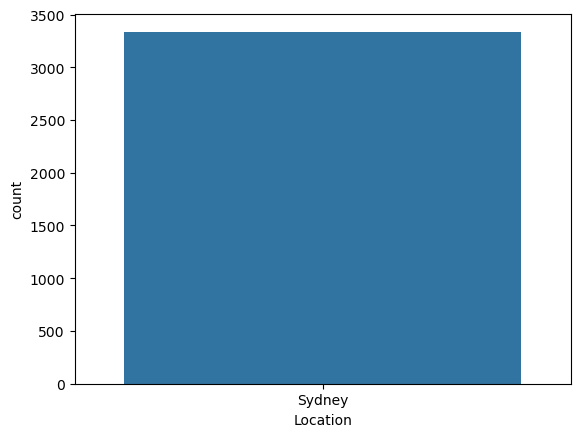

In [19]:
sns.countplot(x='Location', data =df)

<Axes: xlabel='RainTomorrow', ylabel='count'>

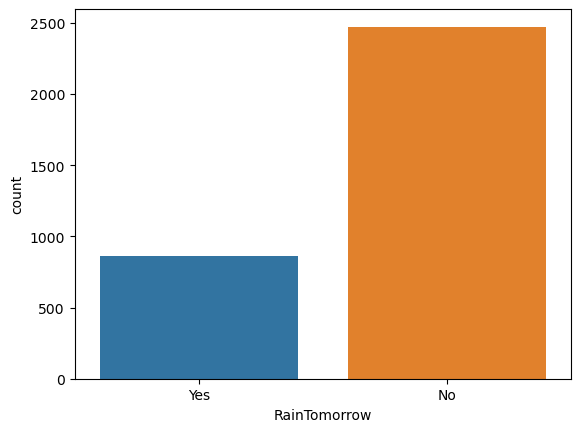

In [20]:
sns.countplot(x='RainTomorrow',data=df)

<Axes: xlabel='RainToday', ylabel='count'>

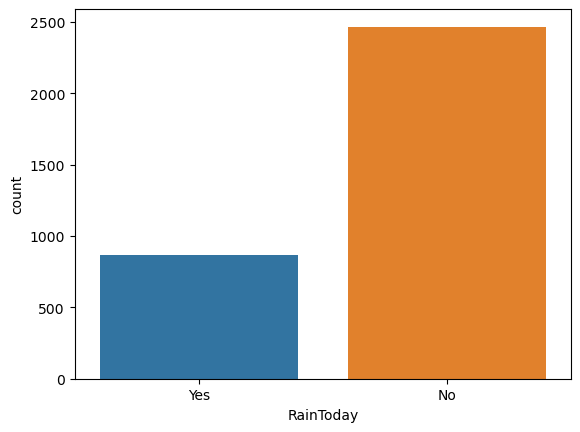

In [21]:
sns.countplot(x='RainToday',data=df)

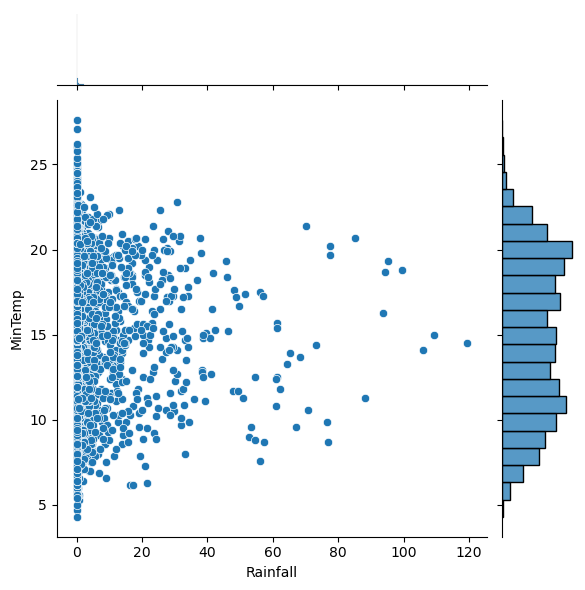

In [23]:
sns.jointplot(x = df.Rainfall, y=df.MinTemp)

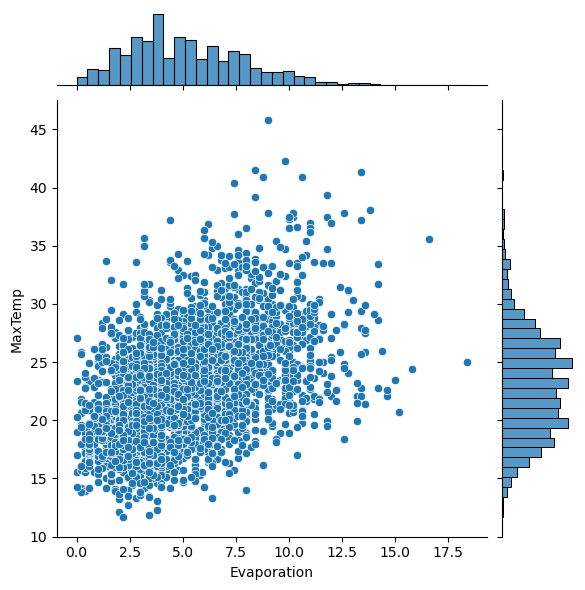

In [24]:
sns.jointplot(x = df.Evaporation, y=df.MaxTemp)

## From the above graphs and EDA, we can find the following inconsistencies:
* Missing data from MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine,  Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm, RainToday fields.           
* Location column only has Sydney, so it can be deleted.
* Rainfall and Evaporation columns have some outliers which needed to be treated.

Let's treat them one by one

#### Missing value impuatation

In [83]:
df = df.fillna(df.mean())

C:\Users\Ashutosh Patel\AppData\Local\Temp\ipykernel_2840\114435927.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df = df.fillna(df.mean())
C:\Users\Ashutosh Patel\AppData\Local\Temp\ipykernel_2840\114435927.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


#### Deleting location column

In [84]:
del df['Location']

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3337 non-null   datetime64[ns]
 1   MinTemp       3337 non-null   float64       
 2   MaxTemp       3337 non-null   float64       
 3   Rainfall      3337 non-null   float64       
 4   Evaporation   3337 non-null   float64       
 5   Sunshine      3337 non-null   float64       
 6   Humidity9am   3337 non-null   float64       
 7   Humidity3pm   3337 non-null   float64       
 8   Pressure9am   3337 non-null   float64       
 9   Pressure3pm   3337 non-null   float64       
 10  Cloud9am      3337 non-null   float64       
 11  Cloud3pm      3337 non-null   float64       
 12  Temp9am       3337 non-null   float64       
 13  Temp3pm       3337 non-null   float64       
 14  RainToday     3331 non-null   object        
 15  RainTomorrow  3337 non-null   object  

#### Treating outliers in rainfall and evaporation columns

In [87]:
np.percentile(df.Rainfall,[95])[0]

20.0

In [88]:
uv1 = np.percentile(df.Rainfall,[95])[0]

In [89]:
df[(df.Rainfall>uv1)]

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
4,2008-02-05,19.7,25.7,77.4,5.187432,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes
7,2008-02-08,17.2,22.3,27.6,5.800000,2.1,77.0,61.0,1008.3,1007.4,7.0,8.0,18.9,21.1,Yes,Yes
26,2008-02-27,19.0,29.0,22.2,8.200000,3.3,82.0,52.0,1014.1,1010.6,7.0,7.0,21.3,24.7,Yes,Yes
28,2008-02-29,14.7,20.6,33.0,7.000000,8.9,65.0,51.0,1015.3,1015.6,5.0,3.0,17.1,19.9,Yes,No
68,2008-04-09,15.6,22.2,22.8,5.400000,5.8,96.0,62.0,1024.6,1021.4,7.0,5.0,16.3,21.1,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3250,2017-03-31,15.3,22.6,42.4,5.187432,9.9,56.0,53.0,1016.4,1015.6,4.0,2.0,16.9,21.6,Yes,No
3253,2017-04-03,14.8,22.0,33.8,4.200000,1.5,90.0,49.0,1028.4,1026.3,8.0,7.0,15.7,21.8,Yes,Yes
3318,2017-06-07,8.8,15.5,54.6,2.600000,0.0,82.0,85.0,1020.2,1019.6,8.0,8.0,13.3,14.2,Yes,Yes
3319,2017-06-08,12.4,18.1,61.0,1.800000,1.3,91.0,84.0,1024.2,1023.4,5.0,6.0,13.3,16.9,Yes,Yes


In [90]:
df.Rainfall[(df.Rainfall > 3*uv1)]=3*uv1

C:\Users\Ashutosh Patel\AppData\Local\Temp\ipykernel_2840\2410692699.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Rainfall[(df.Rainfall > 3*uv1)]=3*uv1


In [91]:
df[(df.Rainfall>uv1)]

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
4,2008-02-05,19.7,25.7,60.0,5.187432,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes
7,2008-02-08,17.2,22.3,27.6,5.800000,2.1,77.0,61.0,1008.3,1007.4,7.0,8.0,18.9,21.1,Yes,Yes
26,2008-02-27,19.0,29.0,22.2,8.200000,3.3,82.0,52.0,1014.1,1010.6,7.0,7.0,21.3,24.7,Yes,Yes
28,2008-02-29,14.7,20.6,33.0,7.000000,8.9,65.0,51.0,1015.3,1015.6,5.0,3.0,17.1,19.9,Yes,No
68,2008-04-09,15.6,22.2,22.8,5.400000,5.8,96.0,62.0,1024.6,1021.4,7.0,5.0,16.3,21.1,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3250,2017-03-31,15.3,22.6,42.4,5.187432,9.9,56.0,53.0,1016.4,1015.6,4.0,2.0,16.9,21.6,Yes,No
3253,2017-04-03,14.8,22.0,33.8,4.200000,1.5,90.0,49.0,1028.4,1026.3,8.0,7.0,15.7,21.8,Yes,Yes
3318,2017-06-07,8.8,15.5,54.6,2.600000,0.0,82.0,85.0,1020.2,1019.6,8.0,8.0,13.3,14.2,Yes,Yes
3319,2017-06-08,12.4,18.1,60.0,1.800000,1.3,91.0,84.0,1024.2,1023.4,5.0,6.0,13.3,16.9,Yes,Yes


In [92]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000
mean,14.865057,23.002339,3.184651,5.187432,7.179374,68.229010,54.699158,1018.346156,1016.018774,4.181523,4.218660,17.819742,21.533333
std,4.551593,4.493290,8.735976,2.756095,3.801737,15.053668,16.261752,7.000492,7.012157,2.505491,2.409531,4.894240,4.301156
min,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000
25%,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.800000,1011.300000,2.000000,2.000000,13.800000,18.400000
50%,14.900000,22.800000,0.000000,4.800000,8.200000,69.000000,56.000000,1018.500000,1016.300000,4.181523,4.218660,18.200000,21.300000
75%,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,64.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000
max,27.600000,45.800000,60.000000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000


In [93]:
np.percentile(df.Evaporation,[85])[0]

8.0

In [94]:
uv2 = np.percentile(df.Evaporation,[85])[0]

In [95]:
df[(df.Evaporation > uv2)]

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
23,2008-02-24,16.5,28.3,0.0,8.6,12.0,48.0,40.0,1007.9,1008.0,0.0,0.0,21.2,26.1,No,No
24,2008-02-25,20.5,24.2,0.0,8.6,1.5,58.0,54.0,1017.5,1016.9,7.0,7.0,21.6,23.5,No,No
26,2008-02-27,19.0,29.0,22.2,8.2,3.3,82.0,52.0,1014.1,1010.6,7.0,7.0,21.3,24.7,Yes,Yes
62,2008-04-03,16.4,22.2,0.0,10.6,9.7,42.0,21.0,1009.9,1010.8,6.0,1.0,16.6,21.2,No,No
226,2008-09-14,17.2,23.5,3.6,9.6,2.8,82.0,79.0,1011.8,1007.4,8.0,6.0,18.0,19.3,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,2017-02-24,21.8,28.0,0.0,10.6,5.7,69.0,56.0,1020.8,1018.6,8.0,7.0,24.5,27.3,No,Yes
3226,2017-03-07,18.8,23.2,0.0,9.4,3.6,73.0,62.0,1017.6,1017.7,7.0,7.0,19.3,21.7,No,Yes
3227,2017-03-08,16.9,23.5,5.0,8.8,1.4,67.0,56.0,1018.5,1017.4,8.0,8.0,19.9,22.0,Yes,No
3239,2017-03-20,23.7,27.9,0.2,8.4,4.4,74.0,66.0,1018.5,1015.6,7.0,7.0,25.8,26.9,No,No


In [96]:
df[(df.Evaporation > 2*uv2)]= 2*uv2

In [97]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000
mean,14.860052,22.993768,3.194241,5.186533,7.186356,68.202639,54.672487,1017.752809,1015.423569,4.188061,4.225187,17.813988,21.529587
std,4.545050,4.491126,8.741257,2.752231,3.806988,15.106206,16.283683,25.512217,25.461751,2.521942,2.426532,4.890142,4.303231
min,4.300000,11.700000,0.000000,0.000000,0.000000,16.000000,10.000000,16.000000,16.000000,0.000000,0.000000,6.400000,10.200000
25%,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.800000,1011.300000,2.000000,2.000000,13.800000,18.400000
50%,14.900000,22.800000,0.000000,4.800000,8.200000,69.000000,56.000000,1018.500000,1016.300000,4.181523,4.218660,18.100000,21.300000
75%,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,64.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000
max,27.100000,45.800000,60.000000,16.000000,16.000000,100.000000,99.000000,1039.000000,1036.700000,16.000000,16.000000,36.500000,44.700000


### Creating Dummy Variables

In [99]:
df=pd.get_dummies(df, columns= ['RainToday','RainTomorrow'], drop_first =True)

In [100]:
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_No,RainToday_Yes,RainTomorrow_No,RainTomorrow_Yes
0,2008-02-01 00:00:00,19.5,22.4,15.6,6.200000,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,0,1,0,1
1,2008-02-02 00:00:00,19.5,25.6,6.0,3.400000,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,0,1,0,1
2,2008-02-03 00:00:00,21.6,24.5,6.6,2.400000,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,0,1,0,1
3,2008-02-04 00:00:00,20.2,22.8,18.8,2.200000,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,0,1,0,1
4,2008-02-05 00:00:00,19.7,25.7,60.0,5.187432,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,0,1,0,1


#### Deleting Redundant Clumns

In [101]:
del df['RainToday_No']
del df['RainTomorrow_No']
del df['Date']

### final look at the data

In [102]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
count,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000
mean,14.860052,22.993768,3.194241,5.186533,7.186356,68.202639,54.672487,1017.752809,1015.423569,4.188061,4.225187,17.813988,21.529587,0.259515,0.259215
std,4.545050,4.491126,8.741257,2.752231,3.806988,15.106206,16.283683,25.512217,25.461751,2.521942,2.426532,4.890142,4.303231,0.438434,0.438269
min,4.300000,11.700000,0.000000,0.000000,0.000000,16.000000,10.000000,16.000000,16.000000,0.000000,0.000000,6.400000,10.200000,0.000000,0.000000
25%,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.800000,1011.300000,2.000000,2.000000,13.800000,18.400000,0.000000,0.000000
50%,14.900000,22.800000,0.000000,4.800000,8.200000,69.000000,56.000000,1018.500000,1016.300000,4.181523,4.218660,18.100000,21.300000,0.000000,0.000000
75%,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,64.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000,1.000000,1.000000
max,27.100000,45.800000,60.000000,16.000000,16.000000,100.000000,99.000000,1039.000000,1036.700000,16.000000,16.000000,36.500000,44.700000,1.000000,1.000000


## Correlation between variables

In [103]:
df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
MinTemp,1.000000,0.769408,0.012090,0.564369,-0.061487,0.052531,0.269731,-0.113415,-0.103802,0.235492,0.163035,0.938634,0.752674,0.019369,0.080729
MaxTemp,0.769408,1.000000,-0.150431,0.502221,0.323702,-0.182368,-0.151024,-0.069698,-0.080268,-0.091324,-0.103151,0.858467,0.960974,-0.187295,-0.148212
Rainfall,0.012090,-0.150431,1.000000,-0.109557,-0.318730,0.344906,0.311063,-0.043059,-0.031048,0.259920,0.215054,-0.061637,-0.153649,0.598931,0.307852
Evaporation,0.564369,0.502221,-0.109557,1.000000,0.181832,-0.400081,-0.108209,-0.186188,-0.174545,-0.027404,-0.027148,0.601686,0.470865,-0.228919,-0.064198
Sunshine,-0.061487,0.323702,-0.318730,0.181832,1.000000,-0.491761,-0.584064,-0.067387,-0.080499,-0.648775,-0.663929,0.114970,0.341249,-0.367660,-0.522002
Humidity9am,0.052531,-0.182368,0.344906,-0.400081,-0.491761,1.000000,0.660148,0.153237,0.150293,0.409685,0.318266,-0.146197,-0.153788,0.400243,0.328900
Humidity3pm,0.269731,-0.151024,0.311063,-0.108209,-0.584064,0.660148,1.000000,0.098181,0.106158,0.443600,0.460980,0.128216,-0.211619,0.343444,0.471584
Pressure9am,-0.113415,-0.069698,-0.043059,-0.186188,-0.067387,0.153237,0.098181,1.000000,0.997025,-0.113179,-0.125066,-0.105954,-0.064580,0.013739,0.004851
Pressure3pm,-0.103802,-0.080268,-0.031048,-0.174545,-0.080499,0.150293,0.106158,0.997025,1.000000,-0.104975,-0.114933,-0.102595,-0.077702,0.029533,0.016853
Cloud9am,0.235492,-0.091324,0.259920,-0.027404,-0.648775,0.409685,0.443600,-0.113179,-0.104975,1.000000,0.614259,0.086676,-0.092327,0.312903,0.325842


## Splitting Data into X and y variables

In [105]:
X = df.loc[:,df.columns!= 'RainTomorrow_Yes']

In [106]:
y = df['RainTomorrow_Yes']

## Train-test Split

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [109]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape 

((2669, 14), (668, 14), (2669,), (668,))

In [110]:
X_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes
2156,18.7,25.7,0.8,3.6,5.6,80.0,59.0,1015.3,1015.0,6.000000,7.00000,20.6,24.4,0
2174,14.3,23.3,29.6,3.2,9.0,69.0,57.0,1019.8,1017.3,5.000000,3.00000,17.7,21.9,1
2591,11.7,16.1,6.6,0.6,0.2,83.0,69.0,1036.8,1034.4,7.000000,7.00000,13.3,15.9,1
1381,14.7,21.6,0.0,7.2,6.8,64.0,48.0,1021.4,1020.8,4.181523,4.21866,18.9,20.8,0
81,14.4,20.3,10.2,3.6,2.0,90.0,55.0,1023.6,1022.3,7.000000,5.00000,16.1,20.1,1


In [111]:
y_train.head()

2156    0
2174    0
2591    0
1381    0
81      1
Name: RainTomorrow_Yes, dtype: uint8

## Importing Logistic Regression

In [112]:
from sklearn.linear_model import LogisticRegression

### Object Creation and fitting training Data

In [113]:
clf_lr = LogisticRegression()

In [114]:
clf_lr.fit(X_train,y_train)

E:\Anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [116]:
clf_lr.intercept_ ,clf_lr.coef_

(array([-0.00039184]),
 array([[-0.10241688,  0.08860192,  0.04032965,  0.01232808, -0.22972369,
          0.00152871,  0.05270201, -0.07771715,  0.07403753, -0.10938097,
          0.1692298 ,  0.04194938, -0.02862507,  0.05523876]]))

## Evaluating Logistic regression Model performance

In [118]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,roc_auc_score, accuracy_score

In [119]:
confusion_matrix(y_train,clf_lr.predict(X_train))

array([[1816,  150],
       [ 305,  398]], dtype=int64)

In [120]:
confusion_matrix(y_test,clf_lr.predict(X_test))

array([[455,  51],
       [ 68,  94]], dtype=int64)

In [121]:
precision_score(y_test,clf_lr.predict(X_test))

0.6482758620689655

In [123]:
accuracy_score(y_train,clf_lr.predict(X_train))

0.8295241663544398

In [122]:
accuracy_score(y_test,clf_lr.predict(X_test))

0.8218562874251497

In [124]:
recall_score(y_train,clf_lr.predict(X_train))

0.566145092460882

In [125]:
recall_score(y_test,clf_lr.predict(X_test))

0.5802469135802469

In [126]:
roc_auc_score(y_train,clf_lr.predict(X_train))

0.7449240213067381

In [128]:
roc_auc_score(y_test,clf_lr.predict(X_test))

0.7397281998731274

# Linear Discriminant Analysis

In [129]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

### Creating object and fitting data

In [132]:
clf_lda = LinearDiscriminantAnalysis()

In [134]:
clf_lda.fit(X_train,y_train)

LinearDiscriminantAnalysis()

## Evaluating Logistic regression Model performance

In [135]:
confusion_matrix(y_train,clf_lda.predict(X_train))

array([[1802,  164],
       [ 282,  421]], dtype=int64)

In [136]:
confusion_matrix(y_test,clf_lda.predict(X_test))

array([[450,  56],
       [ 65,  97]], dtype=int64)

In [137]:
accuracy_score(y_train,clf_lda.predict(X_train))

0.8328962158111652

In [138]:
accuracy_score(y_test,clf_lda.predict(X_test))

0.8188622754491018

In [139]:
precision_score(y_train,clf_lda.predict(X_train))

0.7196581196581197

In [140]:
precision_score(y_test,clf_lda.predict(X_test))

0.6339869281045751

In [141]:
recall_score(y_train,clf_lda.predict(X_train))

0.5988620199146515

In [142]:
recall_score(y_test,clf_lda.predict(X_test))

0.5987654320987654

In [145]:
roc_auc_score(y_train,clf_lda.predict(X_train))

0.7577219560407439

In [146]:
roc_auc_score(y_test,clf_lda.predict(X_test))

0.7440467476699361

# KNN

#### Standardizing Data

In [147]:
from sklearn import preprocessing

In [148]:
scaler = preprocessing.StandardScaler().fit(X_train)

In [149]:
X_train_s =scaler.transform(X_train)

In [150]:
scaler = preprocessing.StandardScaler().fit(X_test)

In [153]:
X_test_s =scaler.transform(X_test)

### KNN Model: We will use GridSearchCV to find the best value of k

In [152]:
from sklearn.neighbors import KNeighborsClassifier

In [156]:
from sklearn.model_selection import GridSearchCV

In [166]:
param_k = {"n_neighbors":(1,2,3,4,5)}

In [167]:
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_k)

In [168]:
grid_search_knn.fit(X_train_s,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': (1, 2, 3, 4, 5)})

In [170]:
grid_search_knn.best_params_

{'n_neighbors': 4}

In [171]:
clf_knn = grid_search_knn.best_estimator_

In [174]:
confusion_matrix(y_train,clf_knn.predict(X_train_s))

array([[1928,   38],
       [ 331,  372]], dtype=int64)

In [173]:
confusion_matrix(y_test,clf_knn.predict(X_test_s))

array([[479,  27],
       [ 83,  79]], dtype=int64)

In [175]:
accuracy_score(y_train,clf_knn.predict(X_train_s))

0.86174597227426

In [176]:
accuracy_score(y_test,clf_knn.predict(X_test_s))

0.8353293413173652

# Decision Tress

In [177]:
from sklearn import tree

In [178]:
clftree = tree.DecisionTreeClassifier(max_depth = 3)

In [179]:
clftree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

### Checking Model Performance

In [180]:
confusion_matrix(y_train,clftree.predict(X_train))

array([[1799,  167],
       [ 299,  404]], dtype=int64)

In [181]:
confusion_matrix(y_test,clftree.predict(X_test))

array([[452,  54],
       [ 66,  96]], dtype=int64)

In [182]:
accuracy_score(y_train,clftree.predict(X_train))

0.8254027725739977

In [184]:
accuracy_score(y_test,clftree.predict(X_test))

0.8203592814371258

## Plotting Tree

In [186]:
dot_data = tree.export_graphviz(clftree,out_file =None, feature_names = X_train.columns,filled =True)

In [188]:
from IPython.display import Image

In [189]:
import pydotplus

In [190]:
graph = pydotplus.graph_from_dot_data(dot_data)

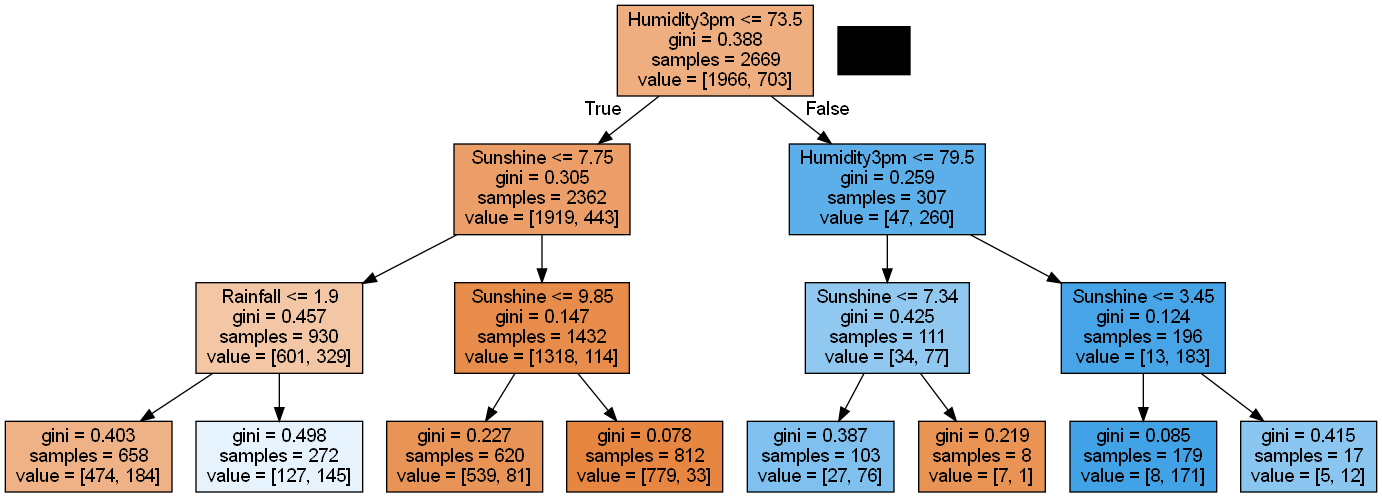

In [193]:
Image(graph.create_png())

## Ensemble Methods

### Bagging

In [195]:
from sklearn.ensemble import BaggingClassifier

In [197]:
clftree2 =tree.DecisionTreeClassifier()

In [206]:
bag_clf=BaggingClassifier(base_estimator = clftree2,n_estimators = 250,bootstrap =True, n_jobs=-1,random_state = 1)

In [207]:
bag_clf.fit(X_train,y_train)

E:\Anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=250,
                  n_jobs=-1, random_state=1)

### Model Performance

In [209]:
confusion_matrix(y_train,bag_clf.predict(X_train))

array([[1966,    0],
       [   0,  703]], dtype=int64)

In [210]:
confusion_matrix(y_test,bag_clf.predict(X_test))

array([[466,  40],
       [ 76,  86]], dtype=int64)

In [211]:
accuracy_score(y_train,bag_clf.predict(X_train))

1.0

In [212]:
accuracy_score(y_test,bag_clf.predict(X_test))

0.8263473053892215

## Random Forest with GridSearchCV

In [213]:
from sklearn.ensemble import RandomForestClassifier

In [214]:
rf_clf = RandomForestClassifier(n_estimators=250,random_state=1)

In [215]:
param_rf = {"max_features":[4,5,6,7,8,9,10],
           "min_samples_split":[25,50,75,100]}

In [216]:
grid_search_rf = GridSearchCV(rf_clf,param_rf,n_jobs=-1,cv=5,scoring ='accuracy')

In [217]:
grid_search_rf.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=250, random_state=1),
             n_jobs=-1,
             param_grid={'max_features': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [25, 50, 75, 100]},
             scoring='accuracy')

In [219]:
grid_search_rf.best_params_

{'max_features': 5, 'min_samples_split': 50}

In [220]:
b_rf_clf = grid_search_rf.best_estimator_

### Evaluating Model Performance

In [221]:
confusion_matrix(y_train,b_rf_clf.predict(X_train))

array([[1895,   71],
       [ 281,  422]], dtype=int64)

In [222]:
confusion_matrix(y_test,b_rf_clf.predict(X_test))

array([[472,  34],
       [ 74,  88]], dtype=int64)

In [223]:
accuracy_score(y_train,b_rf_clf.predict(X_train))

0.8681153990258523

In [224]:
accuracy_score(y_test,b_rf_clf.predict(X_test))

0.8383233532934131

# Boosting

## Gradient Boosting

#### Using GridSearchCV with all the boosting techniques to find the optimized hyperparameters.

In [225]:
from sklearn.ensemble import GradientBoostingClassifier

In [241]:
gbc_clf= GradientBoostingClassifier(random_state = 1)

In [242]:
gbm_params ={'n_estimators': [100, 250, 500],
             'learning_rate': [0.01, 0.1, 1.0],
             'max_depth': [3, 5, 7]}

In [243]:
grid_search_gb = GridSearchCV(gbc_clf, gbm_params,n_jobs = -1, cv = 5, scoring = 'accuracy')

In [244]:
grid_search_gb.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=1),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 250, 500]},
             scoring='accuracy')

In [245]:
grid_search_gb.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

In [246]:
gbc_final = grid_search_gb.best_estimator_

### Performance Evaluation

In [247]:
confusion_matrix(y_train,gbc_final.predict(X_train))

array([[1959,    7],
       [ 120,  583]], dtype=int64)

In [248]:
confusion_matrix(y_test,gbc_final.predict(X_test))

array([[462,  44],
       [ 65,  97]], dtype=int64)

In [249]:
accuracy_score(y_train,gbc_final.predict(X_train))

0.9524166354439865

In [250]:
accuracy_score(y_test,gbc_final.predict(X_test))

0.8368263473053892

### ADA Boost

In [232]:
from sklearn.ensemble import AdaBoostClassifier

In [233]:
ada_clf = AdaBoostClassifier(random_state = 1)

In [265]:
ada_params = {'n_estimators': [ 100, 250,500],
              'learning_rate': [0.01, 0.1, 1.0]}


In [266]:
grid_search_ada = GridSearchCV(ada_clf,ada_params, n_jobs = -1,cv=5 , scoring= 'accuracy')

In [267]:
grid_search_ada.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(n_estimators=250, random_state=1),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [100, 250, 500]},
             scoring='accuracy')

In [268]:
grid_search_ada.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

In [269]:
ada_final = grid_search_ada.best_estimator_

### Performance Evaluation

In [270]:
confusion_matrix(y_train,ada_final.predict(X_train))

array([[1872,   94],
       [ 312,  391]], dtype=int64)

In [271]:
confusion_matrix(y_test,ada_final.predict(X_test))

array([[463,  43],
       [ 66,  96]], dtype=int64)

In [272]:
accuracy_score(y_train,ada_final.predict(X_train))

0.8478831022855002

In [273]:
accuracy_score(y_test,ada_final.predict(X_test))

0.8368263473053892

## XG Boost

In [262]:
import xgboost as xgb

In [264]:
xgb_clf = xgb.XGBClassifier(random_state = 1)

In [274]:
xgb_params = {'n_estimators': [100, 250, 500],
              'learning_rate': [0.01, 0.1, 1.0],
              'max_depth': [3, 5, 7], 
              'min_child_weight': [1, 3, 5]}


In [275]:
grid_search_xgb = GridSearchCV(xgb_clf,xgb_params, n_jobs =-1, cv=5, scoring = 'accuracy')

In [276]:
grid_search_xgb.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=1, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [100, 250, 500]},
             scoring='accuracy')

In [278]:
grid_search_xgb.best_params_

{'learning_rate': 0.01,
 'max_depth': 5,
 'min_child_weight': 3,
 'n_estimators': 250}

In [280]:
xgb_final = grid_search_xgb.best_estimator_

In [281]:
confusion_matrix(y_train,xgb_final.predict(X_train))

array([[1908,   58],
       [ 294,  409]], dtype=int64)

In [282]:
confusion_matrix(y_test,xgb_final.predict(X_test))

array([[472,  34],
       [ 73,  89]], dtype=int64)

In [283]:
accuracy_score(y_train,xgb_final.predict(X_train))

0.8681153990258523

In [284]:
accuracy_score(y_test,xgb_final.predict(X_test))

0.8398203592814372

### Graph of XG Boost

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

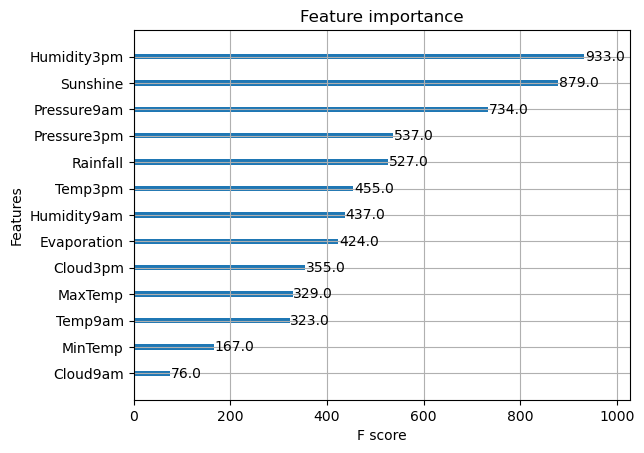

In [285]:
xgb.plot_importance(xgb_final)

# Q.1- Your views about the problem statement?

The Daily Buzz did create a buzz by including weather predictions in their newspaper.The readers relied on the newspaper to schedule their week according to the weather predictions. This indeed increases their market share and helps them in reaching new heights.
Based on the data given, this problem statement of Rainfall Prediction using Machine Learning provides much needed real world relevancy. The data given was pretty comprehensive with missing values, outliers and helped me in expanding my horizon on how to think when using machine learning.

# Q.2- What will be your approach to solving this task?

The data is provided by The Daily Buzz. My approach is pretty simple and is as follows:

* Firstly, importing the required libraries such as numpy,pandas and then loading the data into the Dataframe and then we'll start with our exploratory data analysis.

* Now I'll do data preprocessing which includes outlier treatment, missing value imputation and convert required categorical variables into numeric columns and drop redundant columns.

* Now, its time to start model training. In here, I'll first split the data into X(independent) and y(dependent) variables and then use 80% of data for training and leave 20% of data for testing.

* Since we have to predict rainfall, which is a categorical variable, I'll use Classification models to train and test the model and compare the performance(accuracy score, confusion matrix) of different models and select the one with the highest accuracy.

# Q.3- What were the available ML model options you had to perform this task?

The models available for predicting rainfall which is a categorical variable are:

* Logistic Regression
* Linear Discriminant Analysis (LDA)
* K-Nearest Neighbors (KNN)
* Decision Trees
* Ensemble Trees 
  * Bagging
  * Random forest
  * Boosting(Gradient Boost, Ada Boost, XG Boost)






# Q.4- Which model’s performance is best and what could be the possible reason for that?

In this problem, all the models are giving high accuracy(around 0.8) for test data. XG Boost gave the highest accuracy(0.8398).
XG boost might have performed better as it combines multiple weak learners to create a strong ensemble model. And it also gives more weightage to relevant variables and less weightage to non-relevant variables.

# Q.5- What steps can you take to improve this selected model’s performance even further?

* More data will certainly help the model to learn and make better and accurate predictions. If it is possible to get the missing values that would inmprove the model as well.
* Hyperparameter tuning can be used for other parameters such as (reg_alpha, gamma, subsample and others) and the values for parameters change can also be optimized on a better machine for better results.
